In [1]:
import numpy as np
import rlcluster
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import default_rng
rng = default_rng()
centres = np.array([[0, 0], [0, 5]])
vals1 = rng.normal(loc=centres[0], scale=1.0, size=((2000, 2)))
vals2 = rng.normal(loc=centres[1], scale=0.8, size=((1000, 2)))
vals = np.concatenate((vals1, vals2))

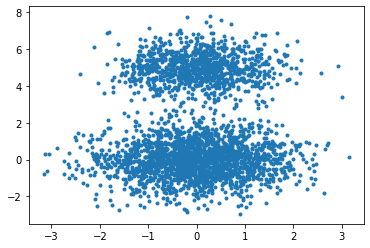

In [3]:
plt.plot(vals[:, 0], vals[:, 1], '.')

In [4]:
dmat = squareform(pdist(vals))
result = rlcluster.cluster(dmat)

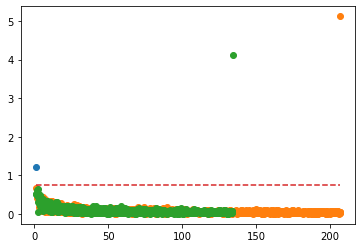

In [5]:
rlcluster.decision_graph(result, plt.axes())

In [6]:
indices = sorted(list(set(result.assignments)))
for i in indices:
    print(i, (result.assignments == i).sum())

-1 1
0 1991
1 1008


In [7]:
print(result.centres)

[1702 2317]


In [8]:
print(vals[result.centres])

[[-0.03740247  0.07007242]
 [ 0.09953407  4.91272347]]


In [9]:
print(result.assignments[result.centres])

[0 1]


In [12]:
np.save('testdata.npy', dmat)

In [11]:
help(rlcluster)

Help on module rlcluster:

NAME
    rlcluster

CLASSES
    builtins.object
        RLClusterResult
    
    class RLClusterResult(builtins.object)
     |  The result from an RL clustering
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    cluster(d, target_fraction=0.02, sigma=5.0, mode='gaussian', rho=None)
        Do Rodriguez-Laio clustering on a square-form distance matrix
    
    decision_graph(result, axes)
        Plot an RL decision graph on a set of matplotlib axes

FILE
    /Users/pazcal/miniconda3/envs/py39/lib/python3.9/site-packages/rlcluster-0.0.5-py3.9.egg/rlclust